<a href="https://colab.research.google.com/github/Luis-Eduardo-P-Ch/Programacion-para-el-Analisis-de-datos/blob/main/An%C3%A1lisis%20Preliminar%20de%20Taxis%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#MUESTREO DE DATOS

cargamos todo los datos de enero

In [2]:
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2016-06.parquet')
df = df.sample(frac=0.01, random_state=434)

In [3]:
#Análisis descriptivo
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,111316.000000,111316.000000,111316.000000,111316.000000,111316.000000,111316.000000,111316.000000,111316.000000,111316.000000,111316.000000,111316.000000,111316.000000,111316.000000,111316.000000
mean,1.530678,1.659806,3.039761,1.045896,162.193440,159.465153,1.350534,13.357783,0.338171,0.497139,1.856166,0.337755,0.299644,16.689664
std,0.499366,1.304249,3.735814,0.720990,67.087582,70.809321,0.496189,11.696421,0.451132,0.040969,3.698258,1.489640,0.014156,14.608348
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-100.000000,-4.500000,-0.500000,-10.560000,0.000000,-0.300000,-100.800000
25%,1.000000,1.000000,1.000000,1.000000,113.000000,107.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.800000
50%,2.000000,1.000000,1.720000,1.000000,162.000000,162.000000,1.000000,10.000000,0.000000,0.500000,1.320000,0.000000,0.300000,12.300000
75%,2.000000,2.000000,3.250000,1.000000,233.000000,233.000000,2.000000,15.500000,0.500000,0.500000,2.460000,0.000000,0.300000,18.500000
max,3.000000,7.000000,90.450000,99.000000,265.000000,265.000000,4.000000,750.000000,4.500000,0.500000,843.820000,42.800000,0.300000,849.120000


In [4]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
1163679,2,2016-06-04 00:41:41,2016-06-04 01:12:57,1,5.29,1,N,255,181,1,23.0,0.5,0.5,4.86,0.0,0.3,29.16,None,None
5973883,2,2016-06-16 20:07:44,2016-06-16 20:24:48,2,3.93,1,N,79,263,2,15.0,0.5,0.5,0.00,0.0,0.3,16.30,None,None
2680778,2,2016-06-08 00:40:36,2016-06-08 00:45:27,2,1.57,1,N,162,107,1,6.5,0.5,0.5,1.00,0.0,0.3,8.80,None,None
4651542,2,2016-06-13 10:06:50,2016-06-13 10:24:34,1,2.30,1,N,143,140,1,13.0,0.0,0.5,3.45,0.0,0.3,17.25,None,None
8404656,1,2016-06-23 14:52:37,2016-06-23 15:23:30,1,3.70,1,N,161,125,1,20.5,0.0,0.5,4.25,0.0,0.3,25.55,None,None


In [7]:
# Filtro el dataframe para quedarme solo con el pago de tarjeta de credito
df_credit_card = df[df['payment_type'] == 1]

df_credit_card.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
1163679,2,2016-06-04 00:41:41,2016-06-04 01:12:57,1,5.29,1,N,255,181,1,23.0,0.5,0.5,4.86,0.0,0.3,29.16,None,None
2680778,2,2016-06-08 00:40:36,2016-06-08 00:45:27,2,1.57,1,N,162,107,1,6.5,0.5,0.5,1.00,0.0,0.3,8.80,None,None
4651542,2,2016-06-13 10:06:50,2016-06-13 10:24:34,1,2.30,1,N,143,140,1,13.0,0.0,0.5,3.45,0.0,0.3,17.25,None,None
8404656,1,2016-06-23 14:52:37,2016-06-23 15:23:30,1,3.70,1,N,161,125,1,20.5,0.0,0.5,4.25,0.0,0.3,25.55,None,None
11061032,1,2016-06-30 20:04:57,2016-06-30 20:38:13,1,3.40,1,N,233,144,1,21.0,0.5,0.5,4.45,0.0,0.3,26.75,None,None


In [8]:
#Análisis descriptivo
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,111316.000000,111316.000000,111316.000000,111316.000000,111316.000000,111316.000000,111316.000000,111316.000000,111316.000000,111316.000000,111316.000000,111316.000000,111316.000000,111316.000000
mean,1.530678,1.659806,3.039761,1.045896,162.193440,159.465153,1.350534,13.357783,0.338171,0.497139,1.856166,0.337755,0.299644,16.689664
std,0.499366,1.304249,3.735814,0.720990,67.087582,70.809321,0.496189,11.696421,0.451132,0.040969,3.698258,1.489640,0.014156,14.608348
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-100.000000,-4.500000,-0.500000,-10.560000,0.000000,-0.300000,-100.800000
25%,1.000000,1.000000,1.000000,1.000000,113.000000,107.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.800000
50%,2.000000,1.000000,1.720000,1.000000,162.000000,162.000000,1.000000,10.000000,0.000000,0.500000,1.320000,0.000000,0.300000,12.300000
75%,2.000000,2.000000,3.250000,1.000000,233.000000,233.000000,2.000000,15.500000,0.500000,0.500000,2.460000,0.000000,0.300000,18.500000
max,3.000000,7.000000,90.450000,99.000000,265.000000,265.000000,4.000000,750.000000,4.500000,0.500000,843.820000,42.800000,0.300000,849.120000


In [10]:
#Cuantos tipos de proveedores hay
vendorid_counts = df['VendorID'].value_counts()
vendorid_counts


2    59039
1    52260
3       17
Name: VendorID, dtype: int64

In [12]:
#Elimino todas las filas donde VendorID es igual a 3
df = df[df['VendorID'] != 3]

df.describe()


,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,111299.000000,111299.000000,111299.000000,111299.000000,111299.000000,111299.000000,111299.000000,111299.000000,111299.000000,111299.000000,111299.000000,111299.000000,111299.000000,111299.000000
mean,1.530454,1.659907,3.039708,1.045903,162.200757,159.462313,1.350515,13.357563,0.338168,0.497138,1.856323,0.337807,0.299644,16.689650
std,0.499074,1.304323,3.735768,0.721045,67.087678,70.810392,0.496187,11.696213,0.451147,0.040972,3.698483,1.489748,0.014157,14.608525
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-100.000000,-4.500000,-0.500000,-10.560000,0.000000,-0.300000,-100.800000
25%,1.000000,1.000000,1.000000,1.000000,113.000000,107.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.800000
50%,2.000000,1.000000,1.720000,1.000000,162.000000,162.000000,1.000000,10.000000,0.000000,0.500000,1.320000,0.000000,0.300000,12.300000
75%,2.000000,2.000000,3.250000,1.000000,233.000000,233.000000,2.000000,15.500000,0.500000,0.500000,2.460000,0.000000,0.300000,18.500000
max,2.000000,7.000000,90.450000,99.000000,265.000000,265.000000,4.000000,750.000000,4.500000,0.500000,843.820000,42.800000,0.300000,849.120000


<Axes: xlabel='tip_amount'>

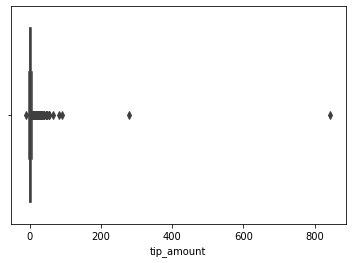

In [13]:
#Identificamos los outliers de tip amount
sns.boxplot(x=df["tip_amount"])

In [15]:
top_tip_amount= np.percentile(df["tip_amount"], 99) * 1.2
top_tip_amount

14.004

In [ ]:
#filtramos el dataset por propina mayor a cero y menor a al percentil 99.

<Axes: xlabel='tip_amount'>

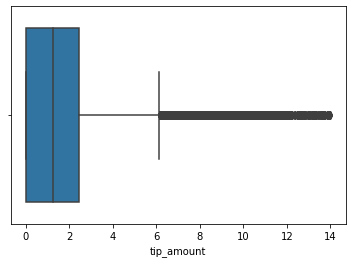

In [18]:
df = df[(df['tip_amount'] < top_tip_amount ) & (df['tip_amount'] >= 0) ]

#Identificamos los outliers de tip amount una vez aplicado el filtro
sns.boxplot(x=df["tip_amount"])

<Axes: xlabel='trip_distance'>

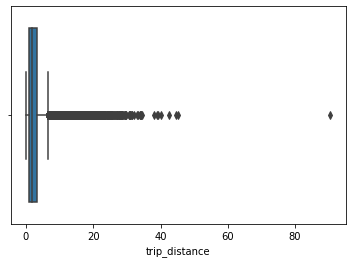

In [19]:
# Revisamos los outliers de la distancia 
sns.boxplot(x=df["trip_distance"])

In [21]:
# Vemos cual es la maxima distancia recorrida
top_distance =  np.percentile(df["trip_distance"],99) * 1.2
top_distance

22.088280000000026

In [22]:
#filtramos los datos con trip distance mayores a cero y menor a variable_percentil_99
df = df[(df['trip_distance'] < top_distance) & (df['trip_distance'] > 0) ]

In [23]:
#calculamos una columna nueva que sea el tiempo de viaje
df["trip_time"] = df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]

In [25]:
#filtramos por tiempo de viaje mayor a cero y menor a variable_parcentil_99 hs (porque el percentil 95 indica 1946 segundos)
top_time = np.percentile(df['trip_time'].astype('timedelta64[s]'),99) * 1.2

df = df[(df['trip_time'].dt.total_seconds() > 0) & (df['trip_time'].dt.total_seconds() < top_time) ]

<Axes: xlabel='trip_time'>

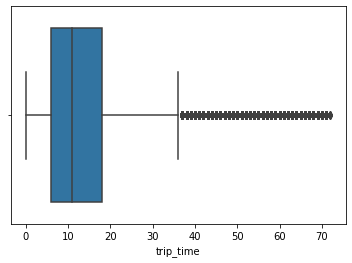

In [26]:
#Revisamos si persiste algun outliers en el tiempo de viaje en minutos 
sns.boxplot(x=df['trip_time'].astype('timedelta64[m]'))

<Axes: xlabel='total_amount'>

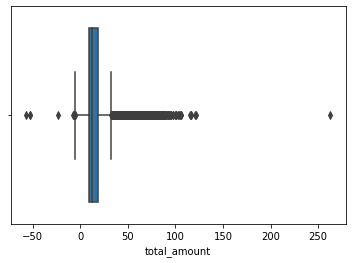

In [27]:
# Revisamos algun outliers en el monto total de la tarifa
sns.boxplot(x=df['total_amount'])

In [28]:
#Revisamos el monto maximo de pago de tarifa
top_amount = np.percentile(df['total_amount'],99) *1.20

<Axes: xlabel='total_amount'>

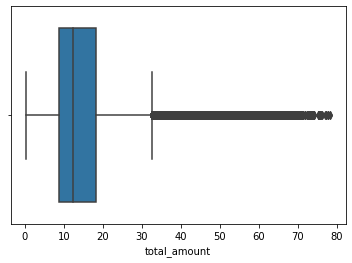

In [30]:
#filtramos los datos por total_amount mayor a cero y menor a variable_percentil_99 dolares
df = df[(df['total_amount'] < top_amount) & (df['total_amount'] > 0) ]

# Revisamos algun outliers en el monto total de la tarifa
sns.boxplot(x=df['total_amount'])

In [31]:
#Ahora obtenemos las estadisticas basicas
df[["trip_distance", "tip_amount","total_amount","trip_time"]].agg(["min", "max","mean","std", "median"])

,trip_distance,tip_amount,total_amount,trip_time
min,0.010000,0.000000,0.300000,0 days 00:00:01
max,22.060000,14.000000,78.350000,0 days 01:12:11
mean,2.896416,1.746800,15.967176,0 days 00:14:25.850262240
std,3.330103,2.157995,11.838482,0 days 00:10:44.938486708
median,1.700000,1.320000,12.300000,0 days 00:11:31


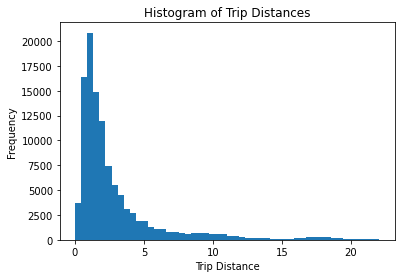

In [32]:
#Distribución  de la distancia recorrida de viaje.
plt.hist(df['trip_distance'], bins=50)
plt.xlabel('Trip Distance')
plt.ylabel('Frequency')
plt.title('Histogram of Trip Distances')
plt.show()

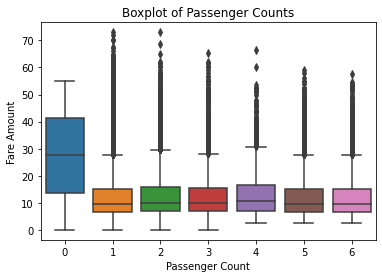

In [33]:
#Distribucion de la cantidad de pasajeros respecto al monto de la tarifa
sns.boxplot(x='passenger_count', y='fare_amount', data=df)
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount')
plt.title('Boxplot of Passenger Counts')
plt.show()

In [35]:
# Encontrar el numero máximo de pasajeros
max_passengers = df['passenger_count'].max()
max_passengers

6

In [36]:
# Filtramos la base para quedarnos con los pasajeros entre 1 y 6. 
df= df[(df['passenger_count'] > 1) & (df['passenger_count'] <= 6)]

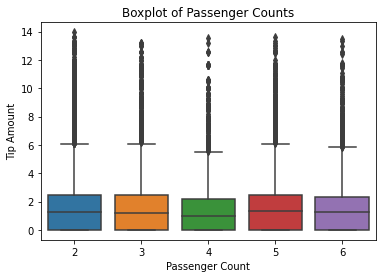

In [40]:
#Distribucion de la propina respecto a la cantidad de pasajeros
sns.boxplot(x='passenger_count', y='tip_amount', data=df)
plt.xlabel('Passenger Count')
plt.ylabel('Tip Amount')
plt.title('Boxplot of Passenger Counts')
plt.show()

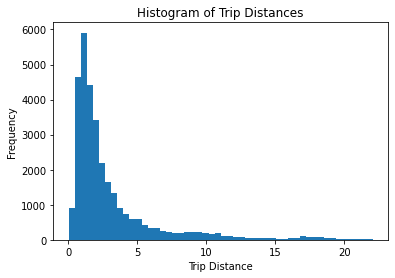

In [37]:
#Distribución  de la distancia recorrida de viaje.
plt.hist(df['trip_distance'], bins=50)
plt.xlabel('Trip Distance')
plt.ylabel('Frequency')
plt.title('Histogram of Trip Distances')
plt.show()

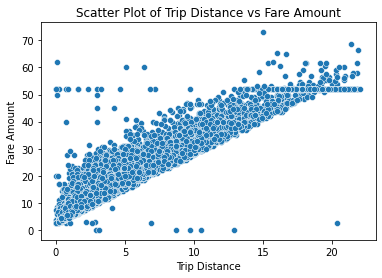

In [38]:
#Relacion entre la distacia del vaije y el monto de la tarifa
sns.scatterplot(x='trip_distance', y='fare_amount', data=df)
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.title('Scatter Plot of Trip Distance vs Fare Amount')
plt.show()


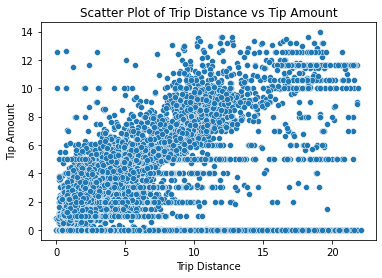

In [39]:
#Relacion entre la distacia del vaije y la propina del viaje
sns.scatterplot(x='trip_distance', y='tip_amount', data=df)
plt.xlabel('Trip Distance')
plt.ylabel('Tip Amount')
plt.title('Scatter Plot of Trip Distance vs Tip Amount')
plt.show()

In [48]:
df['trip_time']=pd.to_numeric(df['trip_time'])

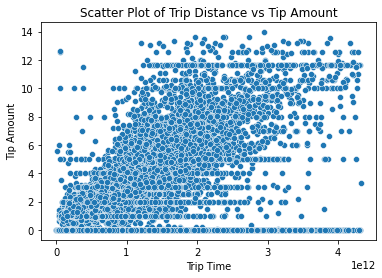

In [49]:
#Relacion entre la tiempo del vaije y la propina del viaje
sns.scatterplot(x='trip_time', y='tip_amount', data=df)
plt.xlabel('Trip Time')
plt.ylabel('Tip Amount')
plt.title('Scatter Plot of Trip Distance vs Tip Amount')
plt.show()

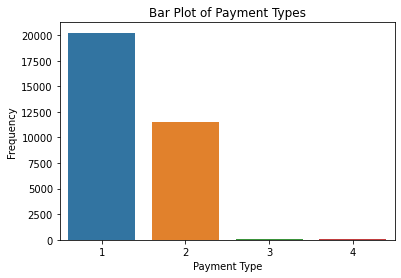

In [41]:
#Grafico para comparar la frecuencia de los tipos de pagos

sns.countplot(x='payment_type', data=df)
plt.xlabel('Payment Type')
plt.ylabel('Frequency')
plt.title('Bar Plot of Payment Types')
plt.show()

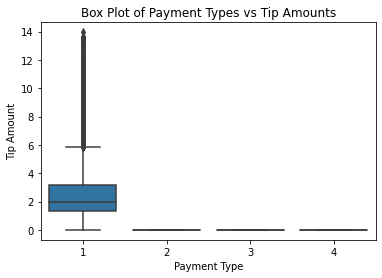

In [42]:
# Que tipo de pago recibe mas propina
sns.boxplot(x='payment_type', y='tip_amount', data=df)
plt.xlabel('Payment Type')
plt.ylabel('Tip Amount')
plt.title('Box Plot of Payment Types vs Tip Amounts')
plt.show()

In [51]:
df.head(3)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_time
5973883,2,2016-06-16 20:07:44,2016-06-16 20:24:48,2,3.93,1,N,79,263,2,15.0,0.5,0.5,0.00,0.0,0.3,16.30,None,None,1024000000000
2680778,2,2016-06-08 00:40:36,2016-06-08 00:45:27,2,1.57,1,N,162,107,1,6.5,0.5,0.5,1.00,0.0,0.3,8.80,None,None,291000000000
2882958,2,2016-06-08 15:24:19,2016-06-08 15:44:49,5,2.16,1,N,211,246,1,14.0,0.0,0.5,2.96,0.0,0.3,17.76,None,None,1230000000000


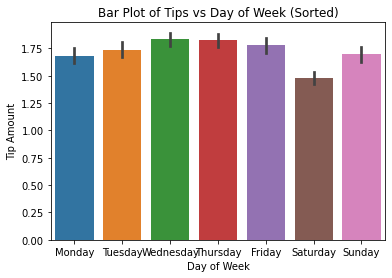

In [53]:
# Como sabemos en que dias se pagaron mas propinas

# Convert pickup datetime column to datetime type
df['pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Create a new column for day of the week
df['day_of_week'] = df['tpep_pickup_datetime'].dt.day_name()

# Define order of days of the week

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a bar plot of tips versus day of the week with sorted days
sns.barplot(x='day_of_week', y='tip_amount', data=df, order=days_order)
plt.xlabel('Day of Week')
plt.ylabel('Tip Amount')
plt.title('Bar Plot of Tips vs Day of Week (Sorted)')
plt.show()

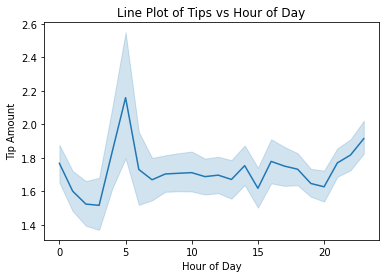

In [54]:
# Como sabemos en que horarios se pagaron más propinas

# Convert pickup datetime column to datetime type
df['pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Create a new column for hour of the day
df['hour_of_day'] = df['tpep_pickup_datetime'].dt.hour

# Create a line plot of tips versus hour of the day
sns.lineplot(x='hour_of_day', y='tip_amount', data=df)
plt.xlabel('Hour of Day')
plt.ylabel('Tip Amount')
plt.title('Line Plot of Tips vs Hour of Day')
plt.show()
